# **Waze Project**

# **Exploratory data analysis**

**The purpose** is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*Plan:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results


# **Visualize a story in Python**

# **PACE stages**


## **PACE: Plan**

### **Imports and data loading**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## **PACE: Analyze**

### **Data exploration and cleaning**

#### **Data overview and summary statistics**


In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.size

194987

Generate summary statistics

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## **PACE: Construct**

1. Outliers can be identified using several methods:

    **Visual Methods:**

    * Box plots: These plots help detect outliers by showing the interquartile range (IQR). Any data point outside 1.5 times the IQR is considered an outlier.
    
    * Scatter plots: Visualize relationships between two variables, making it easy to spot points that deviate significantly from the general trend.
    
   **Statistical Methods:**
  
    * Z-Score: A Z-score measures how many standard deviations a data point is from the mean. A Z-score greater than 3 or less than -3 often indicates an outlier.
    * IQR (Interquartile Range): The IQR method defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile and Q3 is the third quartile.


    **Domain-Specific Methods:** Depending on the dataset, domain knowledge may help identify values that are unrealistic or implausible, which can be considered as outliers.

3. The decision to keep or exclude outliers depends on several factors:

    * Impact on the Model: If the outliers significantly affect the results, it might be best to exclude them.

    * Business Context: Sometimes, outliers represent valuable insights or rare events (e.g., in fraud detection or rare disease studies). If they are relevant to the context or business problem, it may be best to keep them.

    * Modeling Technique: Some models, like tree-based methods (e.g., Random Forest or XGBoost), are less affected by outliers, so retaining them may not hurt performance. On the other hand, algorithms like linear regression or K-means clustering can be heavily influenced by outliers.

    * Data Distribution: If the outliers are genuine values that are part of the natural data distribution, keeping them may provide a more complete and accurate model. However, if they are errors or noise, they should likely be excluded.


### **Visualizations**

Let's begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

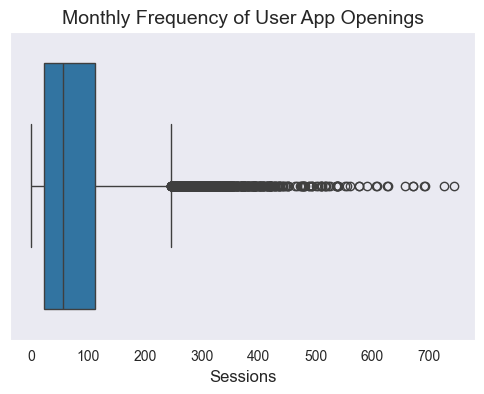

In [7]:
# Box plot
sns.set_style("dark")
sns.color_palette("rocket", as_cmap=True)

plt.figure(figsize=(6, 4))
sns.boxplot(x=df.sessions)
plt.title("Monthly Frequency of User App Openings", fontsize=14)
plt.xlabel("Sessions", fontsize=12)
plt.show()

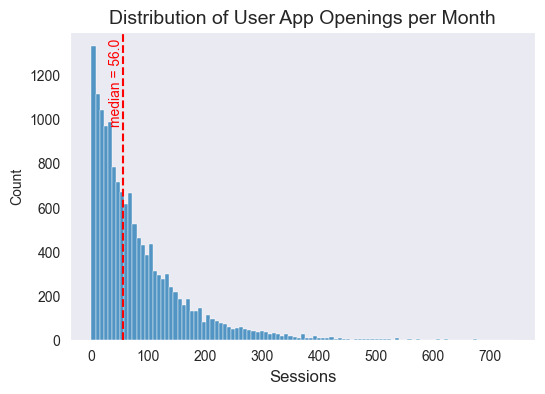

In [72]:
# Histogram

median = df.sessions.median()
annotation = f"median = {median}"

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="sessions") 

median = df.sessions.median()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of User App Openings per Month", fontsize=14)
plt.xlabel("Sessions", fontsize=12)
plt.show()


The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

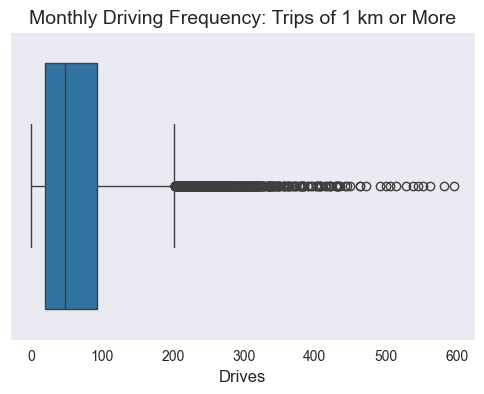

In [8]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.drives)
plt.title("Monthly Driving Frequency: Trips of 1 km or More", fontsize=14)
plt.xlabel("Drives", fontsize=12)
plt.show()

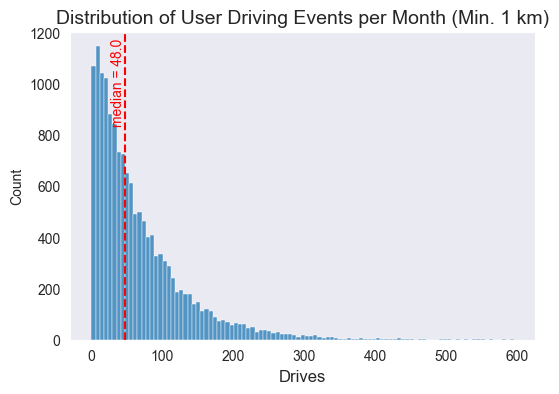

In [9]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="drives")

median = df.drives.median()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of User Driving Events per Month (Min. 1 km)", fontsize=14)
plt.xlabel("Drives", fontsize=12)
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

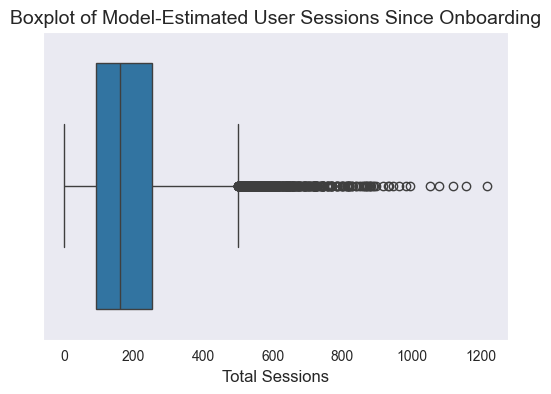

In [10]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.total_sessions)
plt.title("Boxplot of Model-Estimated User Sessions Since Onboarding", fontsize=14)
plt.xlabel("Total Sessions", fontsize=12)
plt.show()

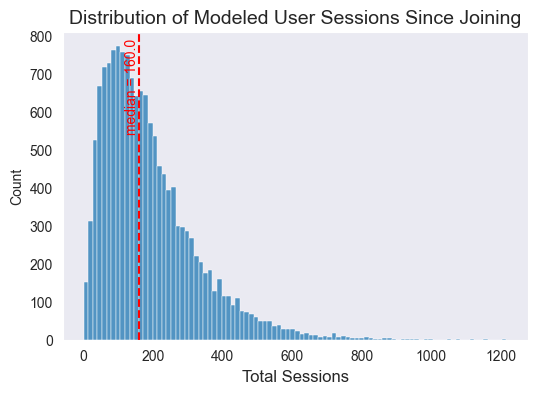

In [11]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="total_sessions")

median = df.total_sessions.median().round()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of Modeled User Sessions Since Joining", fontsize=14)
plt.xlabel("Total Sessions", fontsize=12)
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something we can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

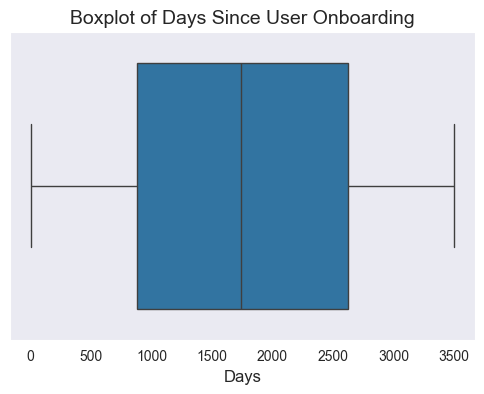

In [12]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.n_days_after_onboarding)
plt.title("Boxplot of Days Since User Onboarding", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.show()

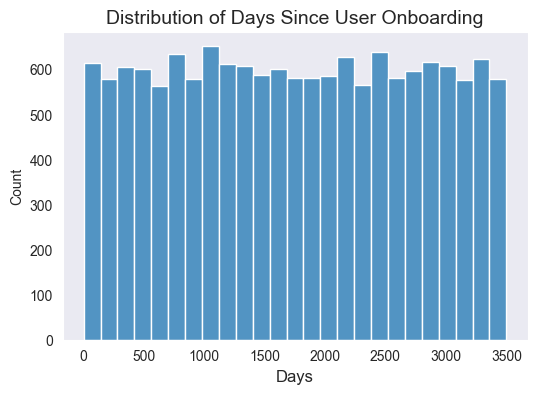

In [13]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="n_days_after_onboarding")

plt.title("Distribution of Days Since User Onboarding", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.show()

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

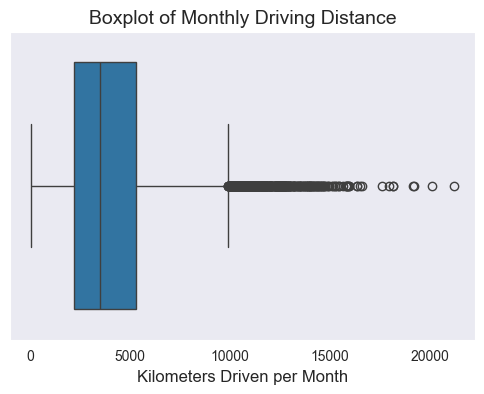

In [14]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.driven_km_drives)
plt.title("Boxplot of Monthly Driving Distance", fontsize=14)
plt.xlabel("Kilometers Driven per Month", fontsize=12)
plt.show()

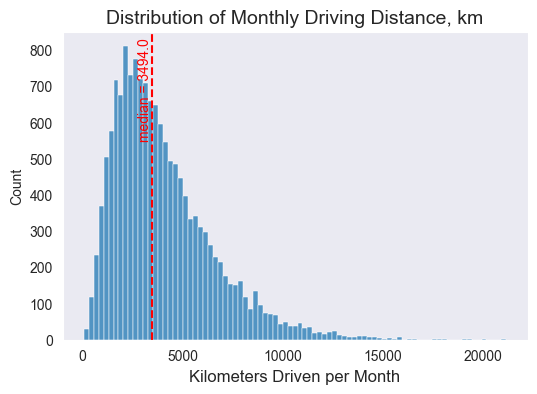

In [15]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="driven_km_drives")

median = df.driven_km_drives.median().round()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of Monthly Driving Distance, km", fontsize=14)
plt.xlabel("Kilometers Driven per Month", fontsize=12)
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As we discovered in the analysis from the previous notebook, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

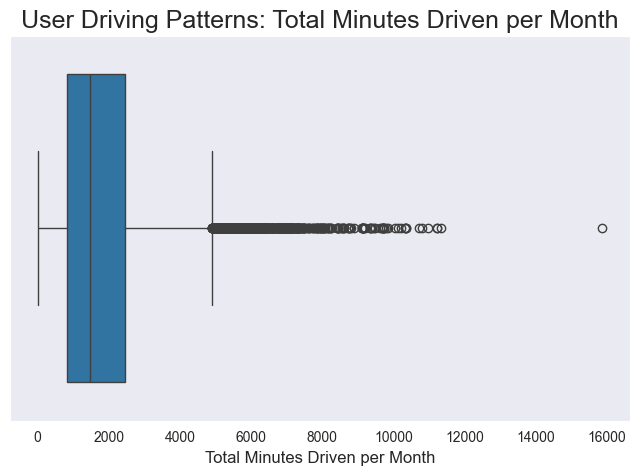

In [16]:
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df.duration_minutes_drives)
plt.title("User Driving Patterns: Total Minutes Driven per Month", fontsize=18)
plt.xlabel("Total Minutes Driven per Month", fontsize=12)
plt.show()

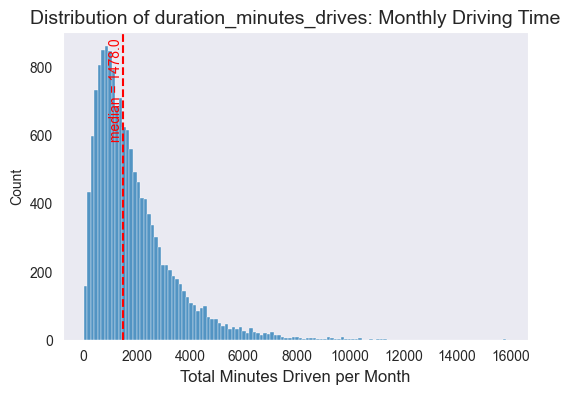

In [17]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="duration_minutes_drives")

median = df.duration_minutes_drives.median().round()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of duration_minutes_drives: Monthly Driving Time", fontsize=14)
plt.xlabel("Total Minutes Driven per Month", fontsize=12)
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

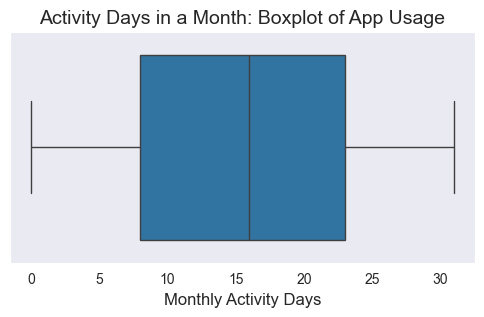

In [18]:
# Box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df.activity_days)
plt.title("Activity Days in a Month: Boxplot of App Usage", fontsize=14)
plt.xlabel("Monthly Activity Days", fontsize=12)
plt.show()

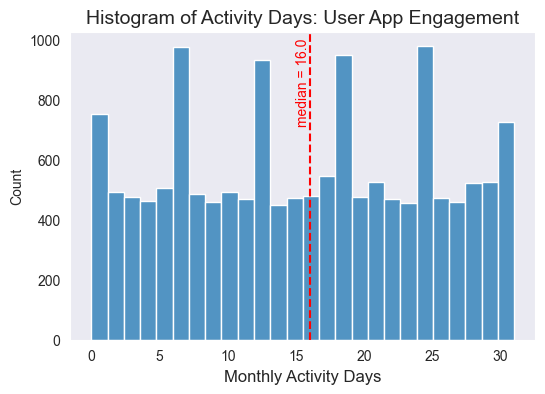

In [19]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="activity_days")

median = df.activity_days.median().round()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Histogram of Activity Days: User App Engagement", fontsize=14)
plt.xlabel("Monthly Activity Days", fontsize=12)
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which might be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

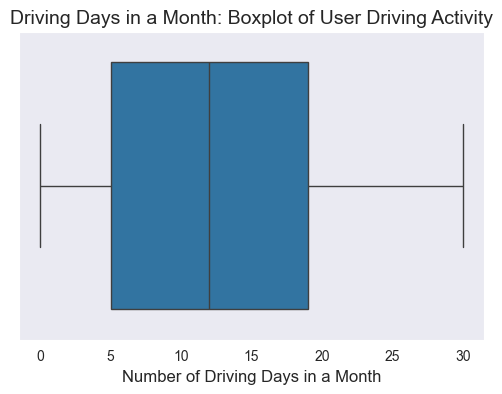

In [20]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.driving_days)
plt.title("Driving Days in a Month: Boxplot of User Driving Activity", fontsize=14)
plt.xlabel("Number of Driving Days in a Month", fontsize=12)
plt.show()

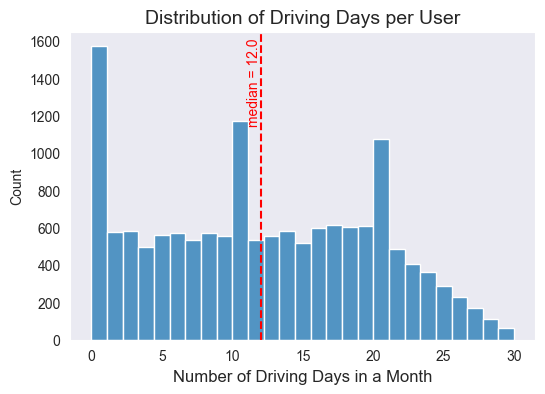

In [21]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="driving_days")

median = df.driving_days.median().round()
annotation = f"median = {median}"
plt.axvline(median, linestyle='--', color='red')  
y_max = plt.ylim()[1]
plt.text(median, y_max * 0.98, annotation, color='r', ha='right', va='top', rotation=90)

plt.title("Distribution of Driving Days per User", fontsize=14)
plt.xlabel("Number of Driving Days in a Month", fontsize=12)
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so there is no need to plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

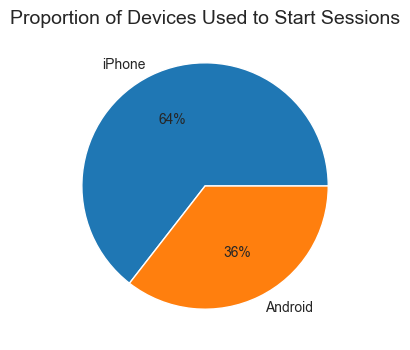

In [22]:
# Pie chart
device_df = df.device.value_counts()
plt.figure(figsize=(6, 4))
plt.pie(device_df, labels=device_df.index, autopct='%.0f%%') 
plt.title("Proportion of Devices Used to Start Sessions", fontsize=14)
plt.show() 

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

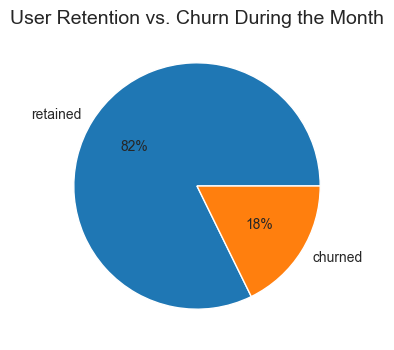

In [23]:
# Pie chart
label_df = df.label.value_counts()
plt.figure(figsize=(6, 4))
plt.pie(label_df, labels=label_df.index, autopct='%.0f%%') 
plt.title("User Retention vs. Churn During the Month", fontsize=14)
plt.show() 

About 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Let's plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

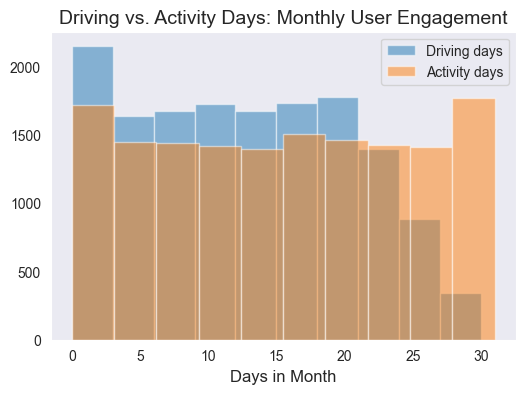

In [24]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df.driving_days, alpha=0.5, label="Driving days")
plt.hist(df.activity_days, alpha=0.5, label="Activity days")
plt.title("Driving vs. Activity Days: Monthly User Engagement", fontsize=14)
plt.legend(loc='upper right')
plt.xlabel("Days in Month", fontsize=12)
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Let's confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [25]:
max_driving_days = df.driving_days.max()
max_activity_days = df.activity_days.max()

print(f"Maximum Driving Days: {max_driving_days}")
print(f"Maximum Activity Days: {max_activity_days}")

Maximum Driving Days: 30
Maximum Activity Days: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

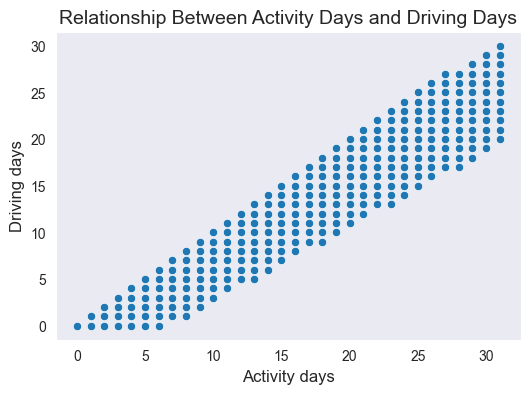

In [26]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="activity_days", y="driving_days")
plt.title("Relationship Between Activity Days and Driving Days", fontsize=14)
plt.xlabel("Activity days", fontsize=12)
plt.ylabel("Driving days", fontsize=12)
plt.show()

Notice that there is a theoretical limit. If we use the app to drive, then by definition it must count as a day-use as well. In other words, we cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

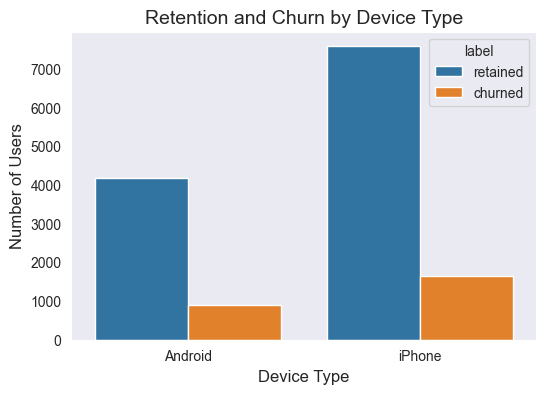

In [27]:
# Histogram
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='device', hue='label')

# Add title and labels
plt.title('Retention and Churn by Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous notebook, we discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Let's examine this further.

1. We'll create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [28]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df["driving_days"]

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity.

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

To fix that, let's do next:

1. Convert these values from infinity to zero.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [29]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Let's plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. 

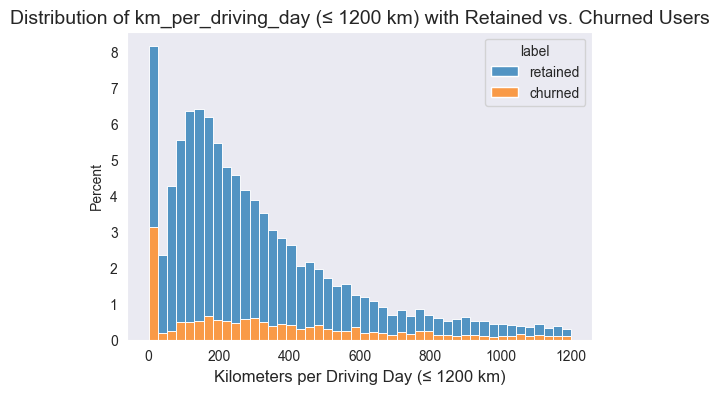

In [30]:
# Histogram

df = df[df['km_per_driving_day'] <= 1200]

plt.figure(figsize=(6, 4))
sns.histplot(
    data=df,
    x="km_per_driving_day",
    hue="label",  # "label" is assumed to represent retained/churned
    multiple="stack",  # Stack the bars
    stat="percent",  # Plot percentages rather than raw counts
    kde=False
)
plt.title("Distribution of km_per_driving_day (≤ 1200 km) with Retained vs. Churned Users", fontsize=14)
plt.xlabel("Kilometers per Driving Day (≤ 1200 km)", fontsize=12)
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous notebook. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

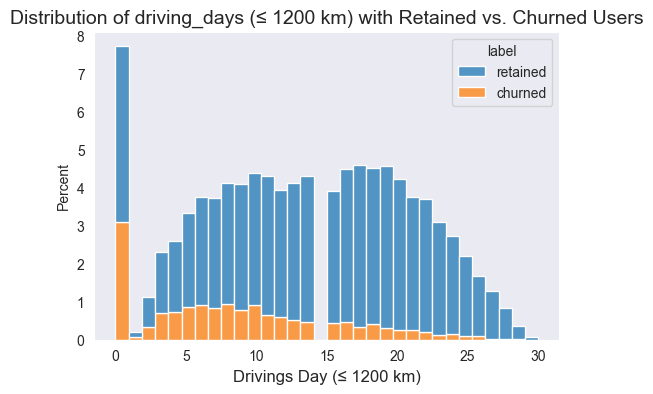

In [31]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(
    data=df,
    x="driving_days",
    hue="label",  # "label" is assumed to represent retained/churned
    multiple="stack",  # Stack the bars
    stat="percent",  # Plot percentages rather than raw counts
    kde=False
)
plt.title("Distribution of driving_days (≤ 1200 km) with Retained vs. Churned Users", fontsize=14)
plt.xlabel("Drivings Day (≤ 1200 km)", fontsize=12)
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [32]:
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) * 100

What is the median value of the new column?

In [33]:
df['percent_sessions_in_last_month'].median()

np.float64(42.42838718198186)

Now, let's create a histogram depicting the distribution of values in this new column.

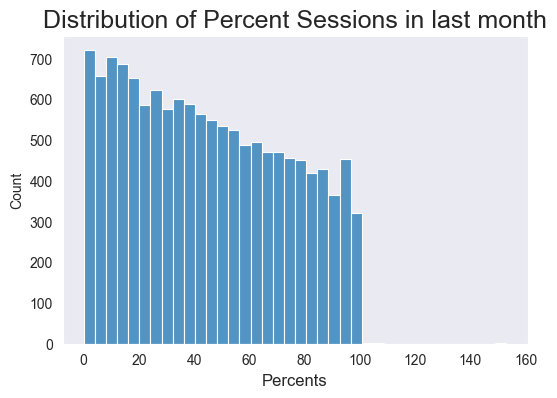

In [34]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="percent_sessions_in_last_month")
plt.title("Distribution of Percent Sessions in last month", fontsize=18)
plt.xlabel("Percents", fontsize=12)
plt.show()

Let's check the median value of the `n_days_after_onboarding` variable.

In [35]:
n_days_after_onboarding_median = df['n_days_after_onboarding'].median()
n_days_after_onboarding_median

np.float64(1731.0)

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

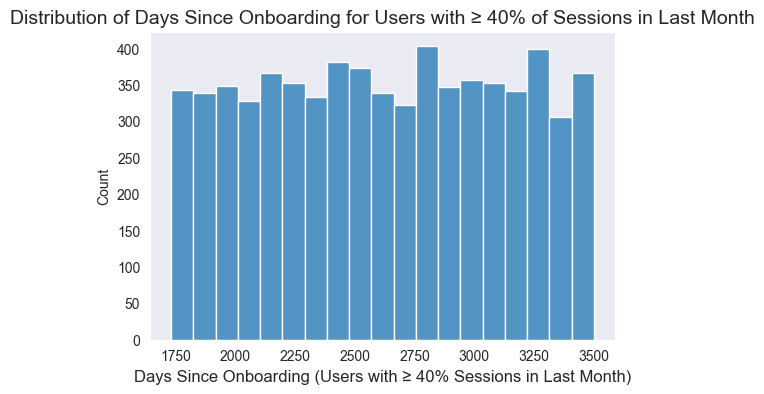

In [36]:
# Histogram
n_days_after_onboarding_42 = df[df["n_days_after_onboarding"] >= n_days_after_onboarding_median]

plt.figure(figsize=(6, 4))
sns.histplot(data=n_days_after_onboarding_42, x="n_days_after_onboarding")
plt.title("Distribution of Days Since Onboarding for Users with ≥ 40% of Sessions in Last Month", fontsize=14)
plt.xlabel("Days Since Onboarding (Users with ≥ 40% Sessions in Last Month)", fontsize=12)
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on the data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, let's write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.

In [37]:
def impute_95q(df, column):
    threshold = df[column].quantile(0.95)
    df.loc[df[column] >= threshold, column] = threshold
    
    return df

Next, let's apply this function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [38]:
columns_with_outliers = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']

for col in columns_with_outliers:
    df = impute_95q(df, col)

Call `describe()` to see if change worked.

In [39]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000,13386.000000
mean,7492.871657,76.698715,64.156955,184.555692,1748.586284,122.064694,29.722247,3729.141466,1709.140337,16.831914,13.324892,310.792581,44.926378
std,4323.484782,67.244470,55.258022,119.064206,1007.491120,148.431576,45.309656,2086.592520,1160.446027,8.607291,7.481807,261.876443,28.631128
min,0.000000,0.000000,0.000000,0.220211,6.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3762.250000,23.000000,21.000000,90.928029,881.000000,9.000000,0.000000,2117.160934,808.046424,10.000000,8.000000,123.813765,19.641966
50%,7472.500000,57.000000,48.000000,159.524795,1731.000000,71.000000,9.000000,3304.249978,1420.681523,17.000000,14.000000,237.347820,42.428387
75%,11245.750000,112.000000,93.000000,255.084401,2621.750000,178.000000,43.000000,4991.483139,2360.241493,24.000000,19.000000,428.922463,68.683952
max,14998.000000,243.000000,201.000000,456.070537,3500.000000,1236.000000,415.000000,8405.476393,4467.745506,31.000000,30.000000,1199.661512,153.063707


#### **Conclusion**

Analysis revealed that the overall churn rate is \~18%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

## **PACE: Execute**

### **Results and evaluation**

**Key insights from the dataset**:

1. User Activity & Distribution: Sessions, drives, and total usage metrics are right-skewed, with a small group of users showing extremely high activity.
2. Churn Patterns: 18% of users churned, with higher churn among infrequent users and long-distance drivers, but retention was strong for daily users.
3. Data Anomalies: Some users recorded impossible driving distances, requiring data cleaning.
4. User Behavior: Many users had a spike in activity last month, raising questions about sudden engagement.
5. Device Consistency: Churn rates were similar across iPhone and Android users.
6. App vs. Driving Usage: Users opened the app more frequently than they drove, possibly for non-driving purposes.

**Further Questions to Investigate:**

* Unusual Usage Spikes: What caused the sudden increase in app usage last month? Was it due to a seasonal trend, marketing campaign, new features, or bot activity?
* Long-Distance Drivers & Churn: Why do long-distance drivers churn more? Do they switch to competitors, experience frustration, or have different needs (e.g., taxi/truck drivers)?
* App Engagement vs. Driving Behavior: Why do some users open the app often but drive rarely? Are they using it for traffic updates, public transport info, or other purposes?
* Retention & Churn Factors: What drives retention the most—session frequency, key features? Which patterns predict churn, and could incentives (e.g., gamification, premium features) help?


**Client Perspective: What Would Waze Want to Know?**

* User Retention & Engagement: What behaviors predict churn, and how can Waze retain at-risk users? How can engagement be increased for low-activity users? Should Waze add features for high-mileage drivers?
* Business & Product Decisions: Should Waze tailor features for different user segments? Are external trends (e.g., commuting, ride-sharing) affecting engagement? Would targeted marketing help re-engage inactive users?
* Data Quality & Accuracy: Are there data inconsistencies that need validation? Should Waze refine data collection to prevent extreme values or anomalies?




### **Conclusion**

Share findings with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?
    
    Many variables showed right-skewed distributions, indicating that most users had lower values for key metrics, with a few high-usage outliers.


2. Was there anything that led you to believe the data was erroneous or problematic in any way?
    
    Some extreme values and sudden usage spikes suggested possible anomalies, bot activity, or data inconsistencies.
    
    
3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

    Yes, the investigation has raised several further questions. For example, what specific factors contributed to the unusual spikes in app usage last month—was it due to a marketing campaign, new features, or external factors like weather or events? Additionally, why do long-distance drivers tend to churn more, and is there an opportunity to address their unique needs, such as offering tailored features for professional drivers? Furthermore, what is driving app engagement in users who open the app frequently but drive infrequently—could this group be using it for alternative purposes like traffic updates or public transport info? Finally, what specific retention drivers (e.g., session frequency, features) are most effective, and could strategies like gamification or premium features help reduce churn in the long term?


4. What percentage of users churned and what percentage were retained?

    Approximately 18% of users churned, and 82% were retained.
    

5. What factors correlated with user churn? How?

    User churn correlates with several factors, including session frequency, driving behavior, and app engagement. Users who engage less frequently with the app or interact with fewer features are more likely to churn. Long-distance drivers, possibly due to unmet needs, also have higher churn rates. Additionally, external factors like app performance and seasonality may influence churn.


6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?
    
    Yes, newer users are more represented, as shown by the higher number of sessions and drives for users with shorter tenures.
    